<a href="https://colab.research.google.com/github/FrancisKurian/CS501/blob/main/ClassProject1_working_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()
#files.upload()

Saving nc-est2015-agesex-res.csv to nc-est2015-agesex-res.csv


In [ ]:
ls

nc-est2015-agesex-res.csv  sample_data/


In [ ]:
from datascience import  *
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib as mpl

In [ ]:
# Claning the data and calculating the total and annual growth rates
us_census2= Table.read_table('nc-est2015-agesex-res.csv')
us_census_flt= us_census2.where('AGE',are.below(999))
us_census_flt2= us_census_flt.where('SEX', are.not_equal_to(0))

us_census_flt3=us_census_flt2.relabeled("POPESTIMATE2010","2010")
us_census_flt4=us_census_flt3.relabeled("POPESTIMATE2015","2015")
us_census_flt5=us_census_flt4.select('SEX','AGE','2010', '2015')

f1=us_census_flt5.with_column('CHANGE',us_census_flt5.column('2015')-us_census_flt5.column('2010'))
f2=f1.with_column('Total_Growth',f1.column('CHANGE')/us_census_flt5.column('2010'))
interest_factor=1/5
f3=f2.with_column('Annual_Growth',(us_census_flt5.column('2015')/us_census_flt5.column('2010'))**interest_factor -1 )

f4=f3.sort('Total_Growth',descending=True )
f4.set_format('Annual_Growth', PercentFormatter)
f4.set_format('Total_Growth', PercentFormatter)
print('Data Sorted by Highest Population Growth:\n',f4)

f5= f4.take[:5]
df_f6=f5.to_df()
print('Top 5 Age Groups by Growth:\n',df_f6)

Data Sorted by Highest Population Growth:
 SEX  | AGE  | 2010    | 2015    | CHANGE | Total_Growth | Annual_Growth
1    | 100  | 9352    | 15088   | 5736   | 61.33%       | 10.04%
1    | 99   | 6104    | 9577    | 3473   | 56.90%       | 9.43%
1    | 97   | 14775   | 23092   | 8317   | 56.29%       | 9.34%
1    | 94   | 43827   | 68135   | 24308  | 55.46%       | 9.23%
1    | 98   | 9505    | 14719   | 5214   | 54.86%       | 9.14%
1    | 95   | 31736   | 48015   | 16279  | 51.30%       | 8.63%
1    | 96   | 22022   | 32585   | 10563  | 47.97%       | 8.15%
1    | 93   | 60182   | 88660   | 28478  | 47.32%       | 8.06%
1    | 68   | 1105699 | 1623929 | 518230 | 46.87%       | 7.99%
2    | 68   | 1254117 | 1812428 | 558311 | 44.52%       | 7.64%
... (192 rows omitted)
Top 5 Age Groups by Growth:
    SEX  AGE   2010   2015  CHANGE  Total_Growth  Annual_Growth
0    1  100   9352  15088    5736      0.613345       0.100387
1    1   99   6104   9577    3473      0.568971       0.094266
2  

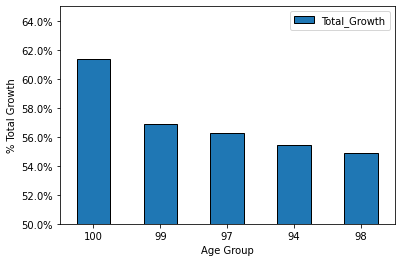

In [ ]:
# Bar chart to show the growth rate by age groups
ax=df_f6.plot.bar(x='AGE', y='Total_Growth', rot=0)
ax.set_ylabel("% Total Growth")
ax.set_xlabel("Age Group")
ax.set_ylim(0.5, 0.65)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.show()

In [ ]:
# Line graphs to show women live longer than men
# read population by SEX  to show women live longer than men.
us_census = pd.read_csv('nc-est2015-agesex-res.csv')
clean_df = us_census.query('AGE <999 & SEX!=0'  )
fig, ax = plt.subplots(figsize=(10,167))
clean_df.groupby(['AGE','SEX']).sum()['POPESTIMATE2015'].unstack().plot(ax=ax, legend=True)
plt.title('Population by Age Groups (0= Age 0-1Yrs,100= 100 or more Years')
ax.ticklabel_format(style='plain')
plt.legend(['Male','Female'])
plt.axis([0, 100, 0, 2500000])
plt.xticks(np.arange(0, 101, 10))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.grid()
plt.show()


NameError: ignored